In [1]:
import pandas as pd

electricity  = pd.read_excel('Folds5x2_pp.xlsx')

print(electricity.info())
electricity.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB
None


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56


AT - Ambient temp, V - Exhaust vacuum, AP - Ambient Pressure,
RH - Relative humidity, PE - Electrical energy output

Target Variable - PE

In [2]:
electricity.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [4]:
electricity.shape

(9568, 5)

In [6]:
train_sizes = [1, 100, 500, 2000, 5000, 7654]

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

features = ['AT', 'V', 'AP', 'RH']
target = 'PE'

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = LinearRegression(), X = electricity[features],
    y = electricity[target], train_sizes=train_sizes, cv=5,
    scoring = 'neg_mean_squared_error')

In [8]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70)
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[ -0.          -0.          -0.          -0.          -0.        ]
 [-19.71230701 -18.31492642 -18.31492642 -18.31492642 -18.31492642]
 [-18.14420459 -19.63885072 -19.63885072 -19.63885072 -19.63885072]
 [-21.53603444 -20.18568787 -19.98317419 -19.98317419 -19.98317419]
 [-20.47708899 -19.93364211 -20.56091569 -20.4150839  -20.4150839 ]
 [-20.98565335 -20.63006094 -21.04384703 -20.63526811 -20.52955609]]

 ----------------------------------------------------------------------

Validation scores:

 [[-619.30514723 -379.81090366 -374.4107861  -370.03037109 -373.30597982]
 [ -21.80224219  -23.01103419  -20.81350389  -22.88459236  -23.44955492]
 [ -19.96005238  -21.2771561   -19.75136596  -21.4325615   -21.89067652]
 [ -19.92863783  -21.35440062  -19.62974239  -21.38631648  -21.811031  ]
 [ -19.88806264  -21.3183303   -19.68228562  -21.35019525  -21.75949097]
 [ -19.9046791   -21.33448781  -19.67831137  -21.31935146  -21.73778949]]


In [9]:
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index=train_sizes))
print('\n', '-'* 20)
print('\nMean validation scores\n\n', pd.Series(validation_scores_mean, index=train_sizes))

Mean training scores

 1       -0.000000
100     18.594403
500     19.339921
2000    20.334249
5000    20.360363
7654    20.764877
dtype: float64

 --------------------

Mean validation scores

 1       423.372638
100      22.392186
500      20.862362
2000     20.822026
5000     20.799673
7654     20.794924
dtype: float64


Mean validation scores since 500 are same as we didn't randomized training data. To randomize set shuffle=True in learning_curve()

(0, 40)

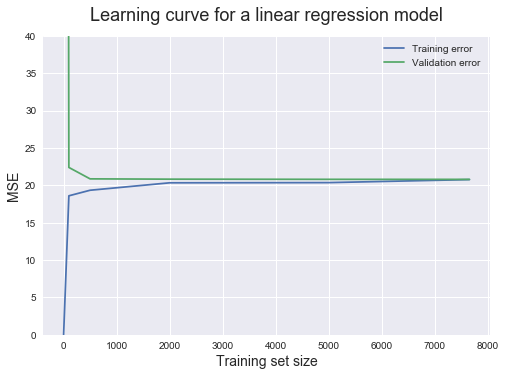

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')

plt.ylabel('MSE', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curve for a linear regression model', fontsize=18, y=1.03)
plt.legend()
plt.ylim(0,40)

Validation curve already converged with training error curve means adding more data will not help. Adding features might help though.

MSE stagnates at 20 MW^2
Taking square root of MSE gives our model inaccuracy
So, our model is off by 4.5MW

If training error is low that means we have high variance
If training error is high that means we have high bias
In our case 20MW^2 is classfied as high error meaning we have high bias 

A narrow gap between validation and training curve indicates low variance. The bigger the gap, the bigger the variance.
Also, High training MSE indicates low variance.

What do we do then ?
1. Train current learning algo on more features. That should lower the bias by increasing the model's complexity.
2. Decreasing regularization. Regularization prevents algo from fitting data too well. If we decrease regularization, the model will fit training data better.

Random Forest regressor 

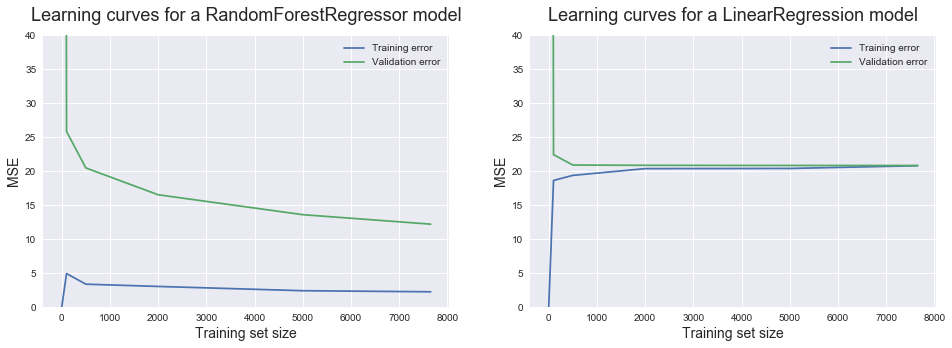

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

def learning_curves(estimator, data, features, target, train_sizes, cv ):
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, data[features], data[target], train_sizes = train_sizes,
        cv = cv, scoring = 'neg_mean_squared_error')
    
    train_scores_mean = -train_scores.mean(axis=1)
    validation_scores_mean = -validation_scores.mean(axis=1)
    plt.plot(train_sizes, train_scores_mean, label='Training error ')
    plt.plot(train_sizes, validation_scores_mean, label='Validation error')
    
    plt.ylabel('MSE', fontsize=14)
    plt.xlabel('Training set size', fontsize=14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize=18, y=1.03)
    plt.legend()
    plt.ylim(0,40)
    
from sklearn.ensemble import RandomForestRegressor
plt.figure(figsize = (16,5))
for model, i in [(RandomForestRegressor(), 1), (LinearRegression(), 2)]:
    plt.subplot(1,2,i)
    learning_curves(model, electricity, features, target, train_sizes, 5 )

The new gap between the two learning curves suggests a substantial increase in variance. The low training MSEs corroborate this diagnosis of high variance.

The large gap and the low training error also indicates an overfitting problem. Overfitting happens when the model performs well on the training set, but far poorer on the test (or validation) set.

Our Random forest learning algorithm suffers from high variance 
and quite low bias, overfitting the training data

Adding more training instances will lead to better model

What do we do then ?
1. Add more training instances 
2. Increase regularization of random forest that should decrease the variance and increase bias
3. Reduce the number of features that will lead to less complex model. Increasing bias and decreasing variance

Lets Regularize Random forest algorithm

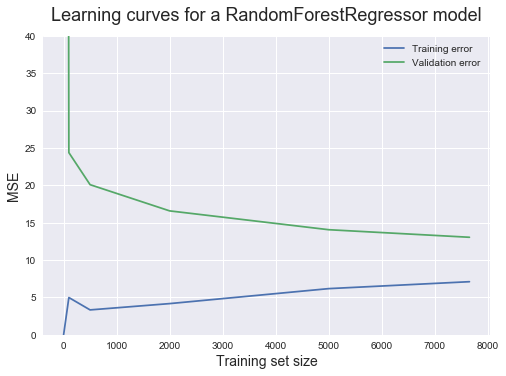

In [16]:
learning_curves(RandomForestRegressor(max_leaf_nodes=350), electricity, features, target, train_sizes, 5)

What more can be done ?
1. Adding more training instances
2. Adding more features
3. Feature selection
4. Hyperparameter optimization

Our learning curve still has irreducible error that is introduced by external factor outside our model and there is no way of knowing how much irreducible error our learning curve has.